### Importando Bibliotecas

In [1]:
#Import lybraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

### Importando e Limpando Dados

In [27]:
#Import dataframe
df = pd.read_csv('titanic-data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
#Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
#Null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

A coluna Cabin apresenta mais de 3/4 das observações como Null, por isso, será desconsiderada. Também serão desconsideradas as 2 observações nulas da coluna Embarked.

In [31]:
df.drop('Cabin', axis=1, inplace=True)

In [32]:
df.dropna(subset='Embarked', axis=0, inplace=True)

In [33]:
df[df['Age']<10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,C
...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,C


In [34]:
l=[]
for i in df['Name'].str.split(','):
    l.append(i[1].split(".")[0])


Podemos observar que os jovens são identificados como 'Master' ou 'Miss' na coluns 'Name'. Os adultos são identificados como 'Mr.', 'Mrs.' ou outras nomenclaturas.

In [35]:
#Mean age of passengers identified as Miss or Master
kid_mean = df[df['Name'].str.contains('Master|Miss')]['Age'].mean()

#Mean age of passengers not identified as Miss or Master
adult_mean = df[~df['Name'].str.contains('Master|Miss')]['Age'].mean()

In [36]:
# Fill NaN Age with mean by group

ind = df[df['Age'].isnull()][df['Name'].str.contains('Master|Miss')].index
df.loc[ind,'Age'] = kid_mean

ind2 = df[df['Age'].isnull()][~df['Name'].str.contains('Master|Miss')].index
df.loc[ind2,'Age'] = adult_mean

/tmp/ipykernel_4662/2489954448.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ind = df[df['Age'].isnull()][df['Name'].str.contains('Master|Miss')].index
/tmp/ipykernel_4662/2489954448.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ind2 = df[df['Age'].isnull()][~df['Name'].str.contains('Master|Miss')].index


A coluna idade apresenta 144 observações nulas. Para preenchê-las, foram calculadas 2 médias. A média dos jovens composto por passageiros identificados como Master e Miss, e a média dos adultos composta por passageiros identificados por outras nomenclaturas.

Os valores vazios foram preenchdos com a média respectiva

In [37]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Visualização dos dados

In [38]:
# Matriz de correlação

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.039581,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.106544,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.337031,0.081656,0.016824,-0.548193
Age,0.039581,-0.106544,-0.337031,1.000000,-0.263062,-0.194343,0.086064
SibSp,-0.057686,-0.034040,0.081656,-0.263062,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.194343,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.086064,0.160887,0.217532,1.000000


- A variável que apresenta maior correlação negativa com a sobrevivência de um passageiro é a classe do qual ele faz parte. Apesar disso, é uma correlação fraca.

- Existe também uma correlação negativa entre a classe do passageiro e sua idade. E naturalmente, uma forte correlação entre a classe do passageiro e a taxa paga por ele.

/home/matheus/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/matheus/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/matheus/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation

[Text(0, 0, 'Cherbourg'), Text(1, 0, 'Queenstown'), Text(2, 0, 'Southampton')]

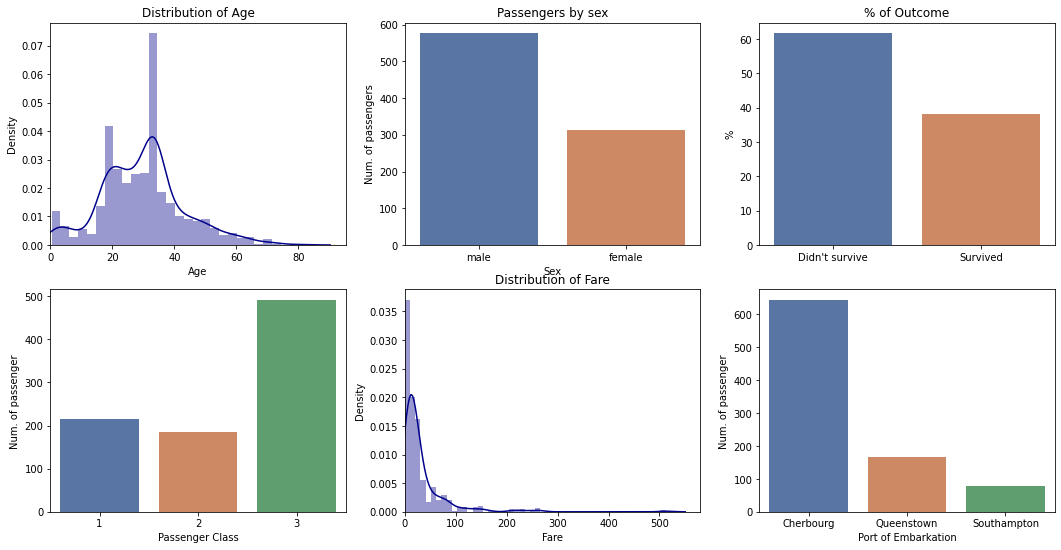

In [12]:
# Visualização geral 

fig, axs = plt.subplots(2,3, figsize=(18,9))

sns.distplot(df['Age'], ax=axs[0,0], color='darkblue')
axs[0,0].set_title("Distribution of Age")
axs[0,0].set_xlim(0)

sns.countplot(df['Sex'], ax=axs[0,1], palette='deep')
axs[0,1].set_title("Passengers by sex")
axs[0,1].set_ylabel("Num. of passengers")


percentage = round(df['Survived'].value_counts(normalize=True).mul(100), 2)
percentage.index = [ "Didn't survive", 'Survived']
sns.barplot(ax=axs[0,2], x = percentage.index, y=percentage.values, palette='deep')
axs[0,2].set_ylabel("%")
axs[0,2].set_title("% of Outcome")

sns.countplot(df['Pclass'], ax=axs[1,0], palette='deep')
axs[1,0].set_ylabel("Num. of passenger")
axs[1,0].set_xlabel("Passenger Class")

sns.distplot(df['Fare'], ax=axs[1,1], color = 'darkblue')
axs[1,1].set_xlim(0)
axs[1,1].set_xlabel("Fare")
axs[1,1].set_title("Distribution of Fare")

sns.countplot(df['Embarked'], ax=axs[1,2], palette='deep')
axs[1,2].set_ylabel("Num. of passenger")
axs[1,2].set_xlabel("Port of Embarkation")
axs[1,2].set_xticklabels(["Cherbourg","Queenstown", "Southampton"])

##### Observações

- Podemos observar que a maior parte dos passageiros se encontra entre os 20 - 40 anos, com mediana e média de 30 anos.

- O titanic contava com quase o dobro de homens, em relação ao número de mulheres. 

- Havia uma maioria dos passageiros viajando na terceira classe, sendo equivalente a mais do que o dobro dos passageiros na primeira e segunda classes.

- Sobre os preços pagos, podemos observar que a maioria dos passageiros pagou um valor inferior a R$ 100, porém também é possível constatar alguns outliers com taxas pagas no valor de até R$ 500.

- Em sua grande maioria, os passasgeiros embarcaram no porto de Cherbourg.

- A taxa de sobrevivência do titanic para todos os passageiros foi de pouco menos de 40%.

#### Sobreviventes por sexo

In [13]:
percentage = df.groupby(['Sex', 'Survived']).count()['Pclass']
percentage.loc['female',:] = (percentage.loc['female']/percentage.loc['female'].sum()).values
percentage.loc['male',:] = (percentage.loc['male']/percentage.loc['male'].sum()).values
data = pd.DataFrame(percentage).reset_index()
data

,Sex,Survived,Pclass
0,female,0,0.259615
1,female,1,0.740385
2,male,0,0.811092
3,male,1,0.188908


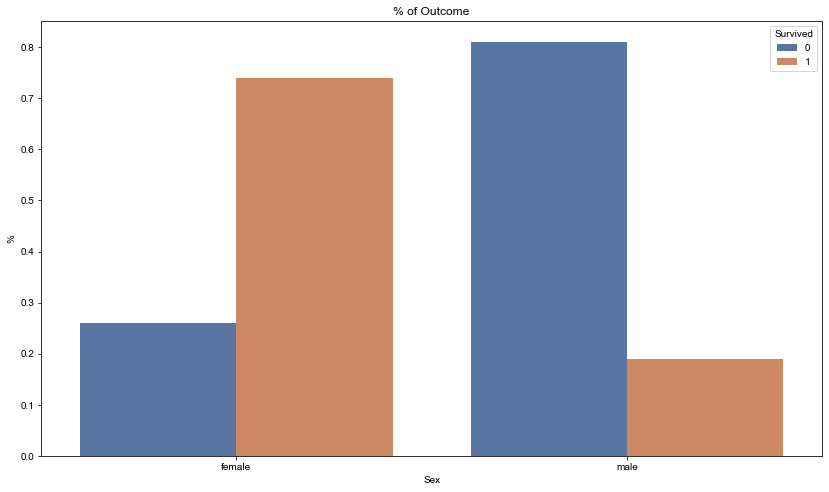

In [14]:
plt.figure(figsize=(14,8))
sns.barplot(y = data['Pclass'], x=data['Sex'], hue=data['Survived'], palette='deep')
plt.title("% of Outcome")
plt.ylabel("%")
sns.set_theme(style = 'white')



Podemos observar uma diferença gritante entre os percentuais de chanche de sobreviver com base no sexo dos passageiros. Isso pode acontecer, por ocorrer uma priorização do resgate de mulheres em situações de perigo.

#### Sobrevivência por idade

In [15]:
l = []
for i in df['Age']:
    if i<5:
        l.append(0)
    elif i<15:
        l.append(10)
    elif i<25:
        l.append(20)
    elif i<35:
        l.append(30)
    elif i<45:
        l.append(40)
    elif i<55:
        l.append(50)
    elif i<65:
        l.append(60)
    elif i<85:
        l.append(70)
        

df['Age Range']=l


Text(0.5, 1.0, '% of Survival by Age')

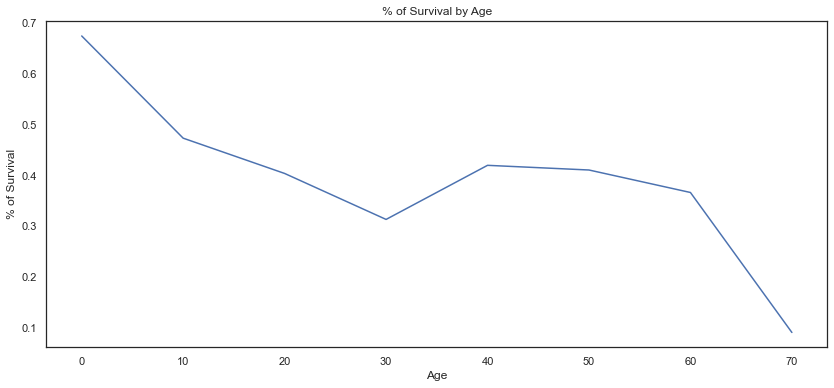

In [16]:
plt.figure(figsize=(14,6))
plt.plot(df.groupby('Age Range').mean()['Survived'])
plt.xlabel("Age")
plt.ylabel("% of Survival")
plt.title("% of Survival by Age")


A % de sobrevivência dentre os passageiros do titanic foi mais alta entre os mais jovens (0-5 anos e 5 - 15 anos). Esse % decai para passageiros mais velhos, chegando ao ponto mais baixo para a faixa de idade entre 25-30 anos.

#### Relação entre idade x taxa paga

Text(0.5, 1.0, 'Fare vs. Age')

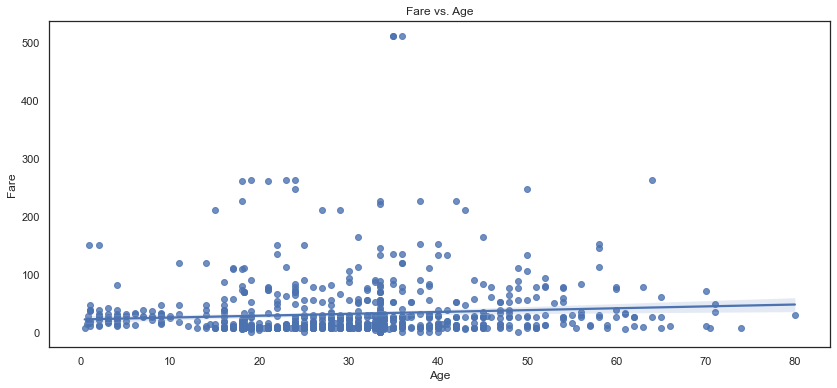

In [49]:
plt.figure(figsize=(14,6))
sns.regplot(x="Age", y="Fare", data=df)
plt.title("Fare vs. Age")

Não existe uma relação clara entre a idade dos passageiros e a taxa paga para embarcar no navio.

#### Sobrevivencia por Classe

Text(0.5, 0, 'Class')

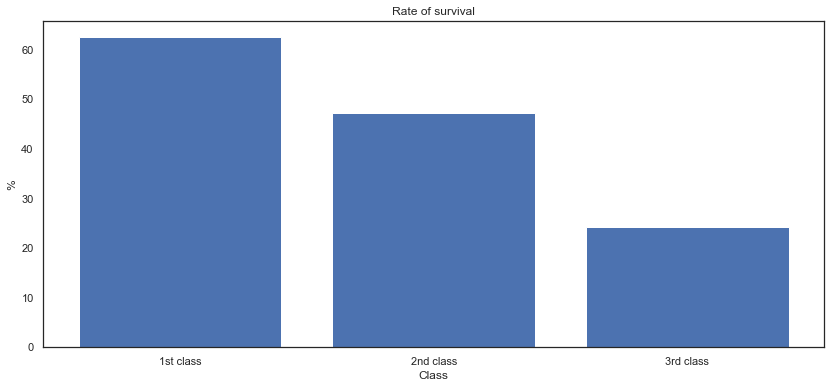

In [54]:
# Rate of survival by class
plt.figure(figsize=(14,6))
plt.bar(x = ['1st class', '2nd class','3rd class'], height = df.groupby('Pclass').mean()['Survived'].values*100)
plt.title("Rate of survival")
plt.ylabel("%")
plt.xlabel("Class")

Os passageiros da 1º classe tem mais do que o dobro de sobreviventes, percentualmente falando, do que os passageiros da 3º classe.

#### Classe x Idade

Text(0.5, 0, 'Class')

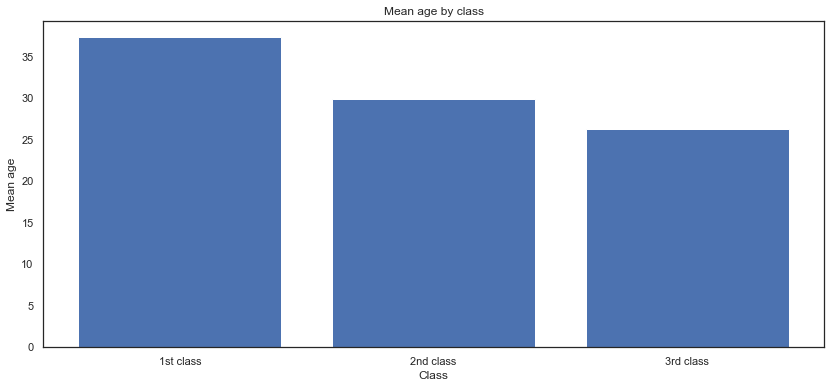

In [57]:
plt.figure(figsize=(14,6))
plt.bar(x = ['1st class', '2nd class','3rd class'], height=df.groupby('Pclass').mean()['Age'].values)
plt.title("Mean age by class")
plt.ylabel("Mean age")
plt.xlabel("Class")

Os passageiros das classe mais caras, em geral, tem uma idade mais avançada do que passageiros de classes mais baratas.